# Product Category Classification

In [72]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Summary
- <a href='#1'>1. Data Loading</a>
- <a href='#2'>1. Data Preprocessing</a>
    - <a href='#2.1'>2.1.  Data Analysis</a>
    - <a href='#2.2'>2.2.  Data Preprocessing</a>
- <a href='#3'>3.  ML Approaches</a>
    - <a href='#3.1'>3.1  Traditional Approach Baseline</a>
    - <a href='#3.2'>3.2  Traditional Approach with add_text column</a>
    - <a href='#3.3'>3.3  Traditional Approach with add_text and manufacturer columns</a>
- <a href='#4'>4. Conclusion</a>

# <a id='1'>1. Data Loading</a>

In [5]:
FILE_PATH = "../data/testset_C.csv" # File Path where the training files are located

In [7]:
df = pd.read_csv(FILE_PATH, sep=';')

In [8]:
df

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON
...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   productgroup  8000 non-null   object
 2   main_text     7998 non-null   object
 3   add_text      8000 non-null   object
 4   manufacturer  6656 non-null   object
dtypes: int64(1), object(4)
memory usage: 312.6+ KB


# <a id='2'>2. Data Preprocessing</a>

## <a id='2'>2.1.  Data Analysis</a>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   productgroup  8000 non-null   object
 2   main_text     7998 non-null   object
 3   add_text      8000 non-null   object
 4   manufacturer  6656 non-null   object
dtypes: int64(1), object(4)
memory usage: 312.6+ KB


In [19]:
df.head(2)

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF


WASHINGMACHINES    2000
BICYCLES           2000
USB MEMORY         2000
CONTACT LENSES     2000
Name: productgroup, dtype: int64


<AxesSubplot:>

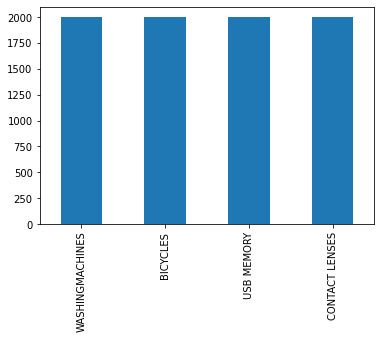

In [20]:
print(df.productgroup.value_counts())
df.productgroup.value_counts().plot(kind='bar')

/              1700
USB            1307
STÜCKUNISEX    1065
CM              618
USB-STICK       525
               ... 
28440             1
PCK:78174         1
933323            1
GREY/ORANGE       1
4KG               1
Length: 9803, dtype: int64


<AxesSubplot:>

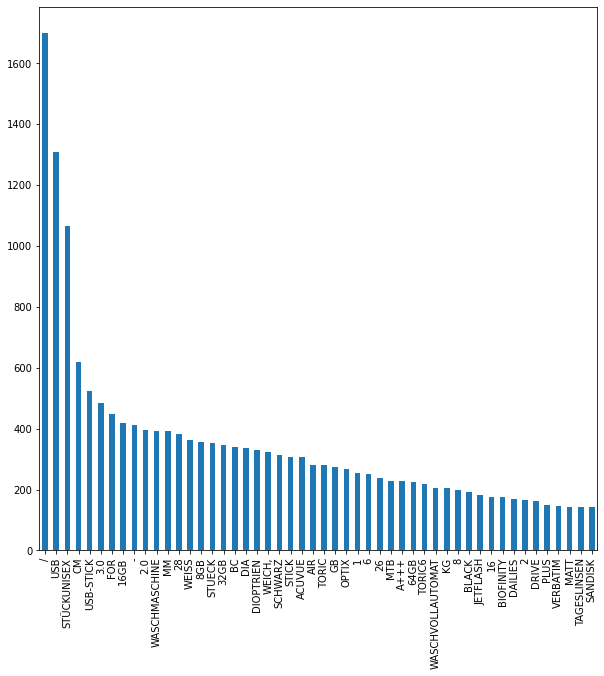

In [23]:
print(df.main_text.str.split(expand=True).stack().value_counts())

df.main_text.str.split(expand=True).stack().value_counts()[0:50].plot(kind='bar',figsize=(10,10))

# We have 8319 different words for our training set as we can see the words that are more common to appear is 
#prepositions "the, of, and so on "

WASCHVOLLAUTOMAT OMV510A+ OMV510A+|| EEK:A+, 1000 U/MIN, 5KG KAPAZITAET  5043487                                                                                        85
PROCLEAR TORIC6 STÜCKUNISEX                                                                                                                                             75
AIR OPTIX FOR ASTIGM.6 STÜCKUNISEX                                                                                                                                      74
BIOFINITY TORIC 6ER BOX6 STÜCKUNISEX                                                                                                                                    71
SOFLENS TORIC6 STÜCKUNISEX                                                                                                                                              68
                                                                                                                                                 

<AxesSubplot:>

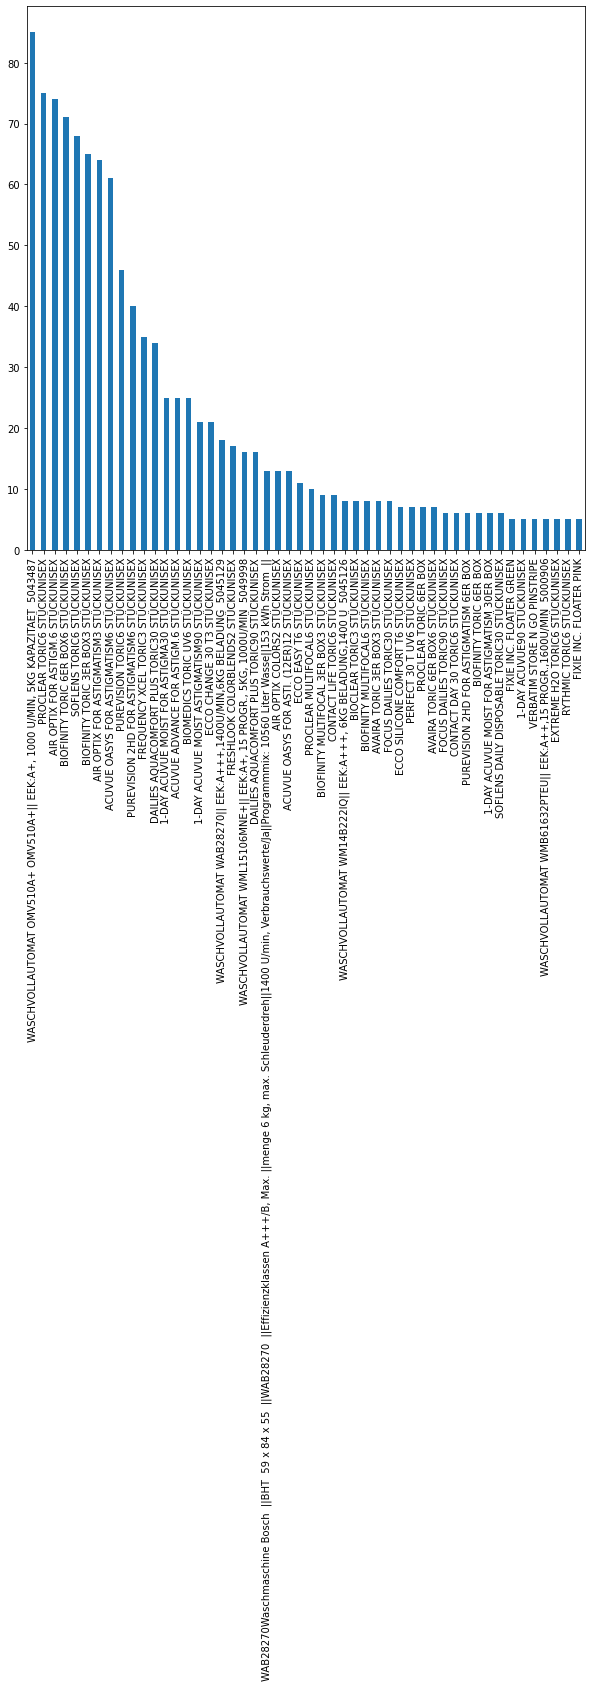

In [24]:
print(df.main_text.value_counts())
df.main_text.value_counts()[0:50].plot(kind='bar',figsize=(10,10))

In [25]:
length_of_the_messages = df["main_text"].str.split()
print("Max number of words inside a text = ", length_of_the_messages.str.len().max())
print("Mean number of words = ", length_of_the_messages.str.len().mean())

# the mean number of words inside a text is about 3 words and the max text found has 102 words

Max number of words inside a text =  214.0
Mean number of words =  7.4533633408352085


In [32]:
df[df.productgroup == "WASHINGMACHINES"].main_text.value_counts()

WASCHVOLLAUTOMAT OMV510A+ OMV510A+|| EEK:A+, 1000 U/MIN, 5KG KAPAZITAET  5043487                                                                                                                                     85
WASCHVOLLAUTOMAT WAB28270|| EEK:A+++,1400U/MIN,6KG BELADUNG  5045129                                                                                                                                                 18
WASCHVOLLAUTOMAT WML15106MNE+|| EEK:A+, 15 PROGR., 5KG, 1000U/MIN  5049998                                                                                                                                           16
WAB28270Waschmaschine Bosch  ||BHT  59 x 84 x 55  ||WAB28270  ||Effizienzklassen A+++/B, Max. ||menge 6 kg, max. Schleuderdreh||1400 U/min, Verbrauchswerte/Ja||Programmmix: 10560 Liter Wasse||153 kWh Strom  ||    13
WASCHVOLLAUTOMAT WM14B222IQ|| EEK:A+++, 6KG BELADUNG,1400 U  5045126                                                                    

In [34]:
df[df.productgroup == "BICYCLES"].main_text.value_counts()

FIXIE INC. FLOATER GREEN                        5
FIXIE INC. FLOATER PINK                         5
SERIOUS ROCKVILLE 27,5 BLACK                    3
TREKKING HERRENRAD  28ER 21-GANG                3
SERIOUS ROCKVILLE 26 BLACK/GREEN                3
                                               ..
GHOST KATO FS 2 SCHWARZ/BLAU 42 CM              1
442540  MTB 275 MTB 27,5 SCHW./TUERKIS 53       1
ATB BOCAS SPORE DIAMANT MATTSCHWARZ 50 CM       1
WINORA SAMOA HERREN GRAU/CYAN MATT 51 CM        1
BERGAMONT ROXTAR 5.0 SCHWARZ/BLAU/GELB 51 CM    1
Name: main_text, Length: 1911, dtype: int64

In [37]:
df[(df.productgroup == "USB MEMORY") ].main_text.value_counts()

VERBATIM STORE N GO PINSTRIPE                                5
VERBATIM STORE N GO V3                                       4
SONY MICRO VAULT USM-X 8GB                                   3
VERBATIM MINI METAL                                          3
LEXAR JUMPDRIVE USB 3.0 32GB                                 3
                                                            ..
INTENSO USB STICK 16GB RAINBOW LINE SCHWARZ  SCHWARZ         1
INTEGRAL USB FLASH DRIVE XPRESSION 16GB USB 2.0 - FLOWERS    1
SANDISK CRUZER SWITCH 16GB                                   1
USB-STICK  32GB TRANSCEND JETFLASH 810 USB3.0 70/18MB/S      1
USB STICK  HAMA 123925                                       1
Name: main_text, Length: 1944, dtype: int64

In [38]:
df[(df.productgroup == "CONTACT LENSES")].main_text.value_counts()

PROCLEAR TORIC6 STÜCKUNISEX                                                                                                     75
AIR OPTIX FOR ASTIGM.6 STÜCKUNISEX                                                                                              74
BIOFINITY TORIC 6ER BOX6 STÜCKUNISEX                                                                                            71
SOFLENS TORIC6 STÜCKUNISEX                                                                                                      68
BIOFINITY TORIC 3ER BOX3 STÜCKUNISEX                                                                                            65
                                                                                                                                ..
ACUVUE OASYS FOR ASTIGMATISM 2-WOCHENLINSEN WEICH, 6 STUECK / BC 8.6 MM / DIA 14.5 / CYL -2.25 / ACHSE 160 / -2.00 DIOPTRIEN     1
FRESHLOOK COLORBLENDS SILBERGRAU MONATSLINSEN WEICH, 2 STUECK / BC 8,6 MM / DIA 14,

## <a id='2.2'>2.2.  Data Preparation/preprocessing</a>

In [40]:
len(df)

8000

In [42]:
# drop rows with only two character and that doesn't contains any linkings 
df_train_preprocessing = df[( df["main_text"].str.len() > 1 )] 

In [44]:
df_train_preprocessing.productgroup.value_counts()

BICYCLES           2000
CONTACT LENSES     2000
WASHINGMACHINES    1999
USB MEMORY         1999
Name: productgroup, dtype: int64

In [45]:
len(df_train_preprocessing)

7998

In [47]:
df_train_preprocessing.drop('id',inplace=True,axis=1)

KeyError: "['id'] not found in axis"

In [48]:
df_train_preprocessing.productgroup.value_counts()

BICYCLES           2000
CONTACT LENSES     2000
WASHINGMACHINES    1999
USB MEMORY         1999
Name: productgroup, dtype: int64

In [66]:
df_train_preprocessing['main_text'] = df_train_preprocessing.main_text.astype('str')

<ipython-input-66-c81c85122c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_preprocessing['main_text'] = df_train_preprocessing.main_text.astype('str')


## <a id='3'>3  ML Approaches</a>

I will focus on testing a Traditional approach vs a Deep learning approach

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

In [93]:
# get the params
tfidf_params = dict(sublinear_tf= True, 
                       min_df = 1, 
                       norm= 'l2',
                       ngram_range= (1,2), 
                       stop_words ='english')

In [94]:
# create a Pipeline that will do features transformation then pass to the model for all training
clf_NB = Pipeline(steps=[
('features', TfidfVectorizer(**tfidf_params)),
('model', MultinomialNB())
])

clf_XGB = Pipeline(steps=[
('features', TfidfVectorizer(**tfidf_params)),
('model', XGBClassifier())
])

## <a id='3.1'>3.1  Traditional Approach Baseline</a>

In [98]:

X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['main_text'], 
                                                    df_train_preprocessing['productgroup'],
                                                    stratify=df_train_preprocessing['productgroup'], 
                                                    test_size=0.10)

# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.98


In [99]:
# Use xgb as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ",accuracy)

Accuracy XGB:  0.98125


### Results

In [100]:
print(report_nb_nopreprocessing)
print("\n")
print(report_xgb_nopreprocessing)

                 precision    recall  f1-score   support

       BICYCLES       0.95      1.00      0.97       200
 CONTACT LENSES       0.99      0.98      0.99       200
     USB MEMORY       0.98      0.98      0.98       200
WASHINGMACHINES       0.99      0.95      0.97       200

       accuracy                           0.98       800
      macro avg       0.98      0.98      0.98       800
   weighted avg       0.98      0.98      0.98       800



                 precision    recall  f1-score   support

       BICYCLES       1.00      0.98      0.99       200
 CONTACT LENSES       0.99      0.96      0.98       200
     USB MEMORY       1.00      0.98      0.99       200
WASHINGMACHINES       0.93      1.00      0.97       200

       accuracy                           0.98       800
      macro avg       0.98      0.98      0.98       800
   weighted avg       0.98      0.98      0.98       800



## <a id='3.2'>3.2  Traditional Approach with preprocessing</a>

In [31]:
# here we only change the training set
X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['text'], df_train_preprocessing[['label']],stratify=df_train_preprocessing['label'], 
                                                    test_size=0.10)


In [32]:

# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.7597765363128491


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Use clf as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ",accuracy)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy XGB:  0.7094972067039106


## RESULTS

In [34]:
print("Report Naive Bayes With Preprocessing\n")

print(report_nb_nopreprocessing)

print("Report XGBoost With Preprocessing\n")

print(report_xgb_nopreprocessing)

Report Naive Bayes With Preprocessing

              precision    recall  f1-score   support

      answer       0.86      0.69      0.76       252
      header       0.00      0.00      0.00        25
       other       0.00      0.00      0.00         4
    question       0.70      0.91      0.79       256

    accuracy                           0.76       537
   macro avg       0.39      0.40      0.39       537
weighted avg       0.74      0.76      0.74       537

Report XGBoost With Preprocessing

              precision    recall  f1-score   support

      answer       0.64      0.94      0.76       252
      header       0.67      0.16      0.26        25
       other       0.00      0.00      0.00         4
    question       0.86      0.55      0.67       256

    accuracy                           0.71       537
   macro avg       0.54      0.41      0.42       537
weighted avg       0.74      0.71      0.69       537



## <a id='3.3'>3.3 Results on the Test Set</a>

In [50]:
y_test= df_test['label']
# predicted 
y_pred = clf_NB.predict(df_test['text'])

report_nb = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.6162092624356775


In [51]:
y_test= df_test['label']
# predicted 
y_pred = clf_XGB.predict(df_test['text'])

report_xgb = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ",accuracy)

Accuracy XGB:  0.5789022298456261


In [52]:

print("Report Naive Bayes With Preprocessing without other label\n")

print(report_nb)

print("Report XGBoost With Preprocessing without other label\n")

print(report_xgb)

Report Naive Bayes With Preprocessing without other label

              precision    recall  f1-score   support

      answer       0.72      0.53      0.61       821
      header       0.00      0.00      0.00       122
       other       0.80      0.01      0.03       312
    question       0.58      0.92      0.71      1077

    accuracy                           0.62      2332
   macro avg       0.52      0.37      0.34      2332
weighted avg       0.63      0.62      0.55      2332

Report XGBoost With Preprocessing without other label

              precision    recall  f1-score   support

      answer       0.49      0.90      0.63       821
      header       0.36      0.21      0.27       122
       other       0.55      0.13      0.21       312
    question       0.81      0.51      0.63      1077

    accuracy                           0.58      2332
   macro avg       0.55      0.44      0.43      2332
weighted avg       0.64      0.58      0.55      2332



# <a id='4'>4 Conclusion</a>

I was able to train a model to detect whether is a answer or a question
some performance testes needs to be done as it is now is not yet read to put into production
Since the results are not that good on the test set.